In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### Load Data From CSV File

In [7]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-07-16 09:53:00--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.1s    

2022-07-16 09:53:01 (228 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [9]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


### Convert to date time object

In [10]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing

In [12]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [13]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.9

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.4.26  |       h06a4308_0         132 KB  anaconda
    certifi-2022.6.15          |   py39h06a4308_0         156 KB  anaconda
    seaborn-0.11.2             |     pyhd3eb1b0_0         223 KB  anaconda
    ------------------------------------------------------------
                                           Total:         511 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  certifi                                         pkgs/main --> anaconda
  seaborn                                         pkgs/main --> anaconda



seaborn-0.11.2       | 223 KB    | ##############################

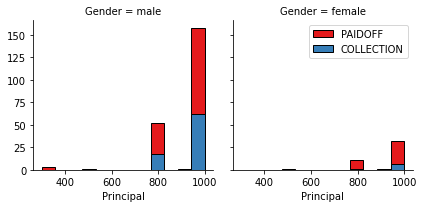

In [16]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 13)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

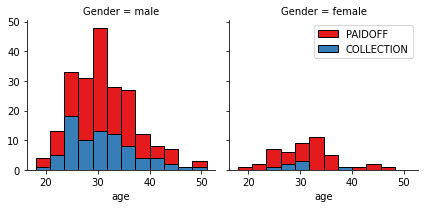

In [17]:
bins = np.linspace(df.age.min(), df.age.max(), 13)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

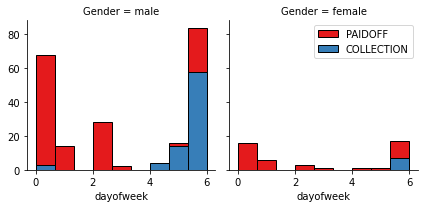

In [18]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [19]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

In [20]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [21]:
#Let's convert male to 0 and female to 1:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?

In [22]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding

In [23]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [24]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection

In [25]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [26]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data

In [27]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification
*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

# K Nearest Neighbor(KNN)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (276, 8) (276,)
Test set:  (70, 8) (70,)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k = 3
#We fit the model:
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
kNN_model
y_pred = kNN_model.predict( X_test )

#Find the max value
accuracies = {}
k_max = 1
acc_max = 0
for k in range(1, 10):
    kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = kNN_model.predict( X_test )
    accuracies[k] = accuracy_score(y_test, y_pred)
    print(k, accuracies[k])

1 0.6428571428571429
2 0.5857142857142857
3 0.7428571428571429
4 0.7
5 0.7428571428571429
6 0.7142857142857143
7 0.8
8 0.7571428571428571
9 0.7428571428571429


In [31]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn import metrics

print("We take k = 7")
knn_model = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

print("Train set Accuracy (Jaccard): ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(y_test, knn_model.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, knn_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, knn_model.predict(X_test), average='weighted'))

We take k = 7
Train set Accuracy (Jaccard):  0.8043478260869565
Test set Accuracy (Jaccard):  0.8
Train set Accuracy (F1):  0.7942614463042823
Test set Accuracy (F1):  0.8


# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
for d in range(1,10):
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = d).fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    print(d, accuracy_score(y_test, y_pred))

1 0.7857142857142857
2 0.7857142857142857
3 0.6142857142857143
4 0.6142857142857143
5 0.6428571428571429
6 0.7714285714285715
7 0.7571428571428571
8 0.7571428571428571
9 0.6571428571428571


In [33]:
print("We take depth = 2")
dt = DecisionTreeClassifier(criterion="entropy", max_depth=2).fit(X_train, y_train)

print("Train set Accuracy (Jaccard): ", metrics.accuracy_score(y_train, dt.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(y_test, dt.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, dt.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, dt.predict(X_test), average='weighted'))

We take depth = 2
Train set Accuracy (Jaccard):  0.7427536231884058
Test set Accuracy (Jaccard):  0.7857142857142857
Train set Accuracy (F1):  0.6331163939859591
Test set Accuracy (F1):  0.6914285714285714


# Support Vector Machine

In [34]:
from sklearn import svm 

In [35]:
for k in ('linear', 'poly', 'rbf','sigmoid'):
    svm_model = svm.SVC( kernel = k).fit(X_train,y_train)
    svm_yhat = svm_model.predict(X_test)
    print("For kernel: {}, the f1 score is: {}".format(k,f1_score(y_test,svm_yhat, average='weighted')))

For kernel: linear, the f1 score is: 0.6914285714285714
For kernel: poly, the f1 score is: 0.7064793130366899
For kernel: rbf, the f1 score is: 0.7275882012724117
For kernel: sigmoid, the f1 score is: 0.6892857142857144


In [36]:
print("So we choose rbf")
svm_model = svm.SVC( kernel = 'rbf').fit(X_train,y_train)


print("Train set Accuracy (Jaccard): ", metrics.accuracy_score(y_train, svm_model.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(y_test, svm_model.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, svm_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, svm_model.predict(X_test), average='weighted'))

So we choose rbf
Train set Accuracy (Jaccard):  0.782608695652174
Test set Accuracy (Jaccard):  0.7428571428571429
Train set Accuracy (F1):  0.7682165861513688
Test set Accuracy (F1):  0.7275882012724117


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

In [38]:
for k in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    lr_model = LogisticRegression(C = 0.01, solver = k).fit(X_train, y_train)
    lr_yhat = lr_model.predict(X_test)
    y_prob = lr_model.predict_proba(X_test)
    print('When Solver is {}, logloss is : {}'.format(k, log_loss(y_test, y_prob)))

When Solver is lbfgs, logloss is : 0.4920179847937498
When Solver is saga, logloss is : 0.49201816623853145
When Solver is liblinear, logloss is : 0.5772287609479654
When Solver is newton-cg, logloss is : 0.492017801467927
When Solver is sag, logloss is : 0.49201400428487596


In [39]:
k = 'liblinear'
lr_model = LogisticRegression(C = 0.01, solver = k).fit(X_train, y_train)

print("Train set Accuracy (Jaccard): ", metrics.accuracy_score(y_train, lr_model.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(y_test, lr_model.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, lr_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, lr_model.predict(X_test), average='weighted'))

Train set Accuracy (Jaccard):  0.7572463768115942
Test set Accuracy (Jaccard):  0.6857142857142857
Train set Accuracy (F1):  0.7341146337750953
Test set Accuracy (F1):  0.6670522459996144


# Model Evaluation using Test set

In [40]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [41]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-07-16 10:14:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-07-16 10:14:55 (39.2 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [42]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [43]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature1 = test_df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature1,pd.get_dummies(test_df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)


x_loan_test = Feature1
x_loan_test = preprocessing.StandardScaler().fit(x_loan_test).transform(x_loan_test)

y_loan_test = test_df['loan_status'].values

In [44]:
knn_pred = kNN_model.predict(x_loan_test)
j1 = accuracy_score(y_loan_test, knn_pred)

dt_pred = dt.predict(x_loan_test)
j2 = accuracy_score(y_loan_test, dt_pred)

svm_pred = svm_model.predict(x_loan_test)
j3 = accuracy_score(y_loan_test, svm_pred)

lr_pred = lr_model.predict(x_loan_test)
j4 = accuracy_score(y_loan_test, lr_pred)

jaccard = [j1, j2, j3, j4]
jaccard

[0.7037037037037037,
 0.7407407407407407,
 0.7962962962962963,
 0.7407407407407407]

In [45]:
knn_pred = kNN_model.predict(x_loan_test)
f1 = f1_score(y_loan_test, knn_pred, average='weighted')

dt_pred = dt.predict(x_loan_test)
f2 = f1_score(y_loan_test, dt_pred, average='weighted')


svm_pred = svm_model.predict(x_loan_test)
f3 = f1_score(y_loan_test, svm_pred, average='weighted')

lr_pred = lr_model.predict(x_loan_test)
f4 = f1_score(y_loan_test, lr_pred, average='weighted')

f1s = [f1, f2, f3, f4]
f1s

[0.6736355806123249,
 0.6304176516942475,
 0.7583503077293734,
 0.6604267310789049]

In [46]:
from sklearn.metrics import log_loss

lr_pred = lr_model.predict_proba(x_loan_test)
aux = log_loss(y_loan_test, lr_pred)

log_loss = ['NA','NA','NA', aux]
log_loss

['NA', 'NA', 'NA', 0.5672153379912981]

In [47]:
index   = ["KNN", "Decision Tree", "SVM", "Logistic Regression"]
colunms = ["Jaccard", "F1-score", "LogLoss"]

data = [jaccard, f1s, log_loss]
data = np.array(data).T

df = pd.DataFrame(data, index=index, columns=colunms)
df

,Jaccard,F1-score,LogLoss
KNN,0.7037037037037037,0.6736355806123249,NA
Decision Tree,0.7407407407407407,0.6304176516942475,NA
SVM,0.7962962962962963,0.7583503077293734,NA
Logistic Regression,0.7407407407407407,0.6604267310789049,0.5672153379912981
